In [149]:
import time
import random
import matplotlib.pyplot as plt
import seaborn

In [150]:
def bubbleSort(arr):
    n = len(arr)
    for i in range(n):
        swapped = False 
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped = True
        if not swapped:
            break
    return arr

In [151]:
def selectionSort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]  # Swap only once per iteration
    return arr


In [152]:
def insertionSort(arr):
    n = len(arr)
    for i in range(1, n):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr


In [153]:
# Quick sort 
def randomized_quick_sort(arr):
    quick_sort(arr,0,len(arr)-1)

def quick_sort(arr,low,high):
    if low < high:
        pivot=randomized_partition(arr,low,high)
        quick_sort(arr,low,pivot-1)
        quick_sort(arr,pivot+1,high)

def randomized_partition(arr,low,high):
    random_pivot =random.randint(low,high)
    arr[random_pivot] , arr[high] =  arr[high] , arr[random_pivot] 
    return   partition(arr,low,high)
    
def partition(arr, low, high):
    pivot = arr[high]  
    i = low - 1 

    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]  

    arr[i + 1], arr[high] = arr[high], arr[i + 1]  
    return i + 1



In [154]:
def heapify(arr, n, i):
    largest = i  
    left = 2 * i + 1  
    right = 2 * i + 2  

    if left < n and arr[left] > arr[largest]:  
        largest = left  

    if right < n and arr[right] > arr[largest]:  
        largest = right  

    if largest != i:  
        arr[i], arr[largest] = arr[largest], arr[i]  
        heapify(arr, n, largest)  

def heap_sort(arr):
    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  
        heapify(arr, i, 0)  


In [155]:
# generate random arrays 

def generate_random_array(size):
    # throw any var 
        return [random.randint(0, 10000) for _ in range(size)]
        

In [156]:
def measureTime(sortFunction, arr):
    start_time = time.time()  
    sortFunction(arr.copy())
    end_time = time.time()
    return (end_time - start_time) * 1000  
    
    

In [157]:
bubbleSort_time = []
selectionSort_time = []
insertionSort_time = []
quickSort_time = []
heapSort_time = []

sizes = [50, 100, 500, 1000, 2500, 5000, 7500, 10000]

for size in sizes:
    arr = generate_random_array(size)
    
    quickSort_result = measureTime(randomized_quick_sort, arr)
    bubbleSort_result = measureTime(bubbleSort, arr)
    selectionSort_result = measureTime(selectionSort, arr)
    insertionSort_result = measureTime(insertionSort, arr)
    heapSort_result = measureTime(heap_sort, arr)
    
    quickSort_time.append(quickSort_result)
    bubbleSort_time.append(bubbleSort_result)
    selectionSort_time.append(selectionSort_result)
    insertionSort_time.append(insertionSort_result)
    heapSort_time.append(heapSort_result)
    # //////////////////////////////////////////////////////////print 
    print(f"Size: {size}")
    print(f"Bubble Sort Time: {bubbleSort_time[-1]:.2f} ms")
    print(f"Selection Sort Time: {selectionSort_time[-1]:.2f} ms")
    print(f"Insertion Sort Time: {insertionSort_time[-1]:.2f} ms")
    print(f"Quick Sort Time: {quickSort_time[-1]:.2f} ms")
    print(f"Heap Sort Time: {heapSort_time[-1]:.2f} ms")
    print("-" * 30)

Size: 50
Bubble Sort Time: 0.40 ms
Selection Sort Time: 0.19 ms
Insertion Sort Time: 1.37 ms
Quick Sort Time: 0.18 ms
Heap Sort Time: 0.27 ms
------------------------------
Size: 100
Bubble Sort Time: 5.71 ms
Selection Sort Time: 0.80 ms
Insertion Sort Time: 0.62 ms
Quick Sort Time: 0.38 ms
Heap Sort Time: 0.65 ms
------------------------------
Size: 500
Bubble Sort Time: 43.82 ms
Selection Sort Time: 10.27 ms
Insertion Sort Time: 10.54 ms
Quick Sort Time: 2.06 ms
Heap Sort Time: 4.03 ms
------------------------------
Size: 1000
Bubble Sort Time: 85.34 ms
Selection Sort Time: 39.48 ms
Insertion Sort Time: 42.81 ms
Quick Sort Time: 3.74 ms
Heap Sort Time: 5.19 ms
------------------------------
Size: 2500
Bubble Sort Time: 521.23 ms
Selection Sort Time: 229.93 ms
Insertion Sort Time: 263.68 ms
Quick Sort Time: 7.72 ms
Heap Sort Time: 15.11 ms
------------------------------
Size: 5000
Bubble Sort Time: 3173.48 ms
Selection Sort Time: 951.70 ms
Insertion Sort Time: 1522.61 ms
Quick Sort Ti

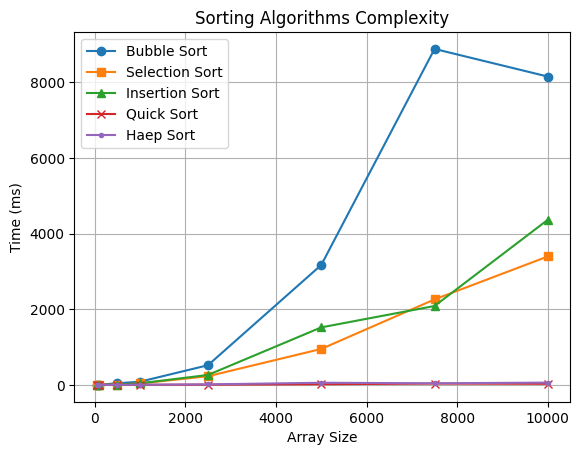

In [158]:
# ///////////////////////////visualization ///////////////////////////////
plt.Figure(figsize=(10, 5))
# plt.style.use('fivethirtyeight')
plt.plot(sizes, bubbleSort_time, marker='o', label='Bubble Sort')
plt.plot(sizes, selectionSort_time, marker='s', label='Selection Sort')
plt.plot(sizes, insertionSort_time, marker='^', label='Insertion Sort')
plt.plot(sizes, quickSort_time, marker='x', label='Quick Sort')
plt.plot(sizes, heapSort_time, marker='.', label='Haep Sort')


plt.xlabel("Array Size")
plt.ylabel("Time (ms)")
plt.title("Sorting Algorithms Complexity")
plt.legend()
plt.grid()
plt.show()